In [1]:
import cv2
import numpy as np
import os
import sys
import tensorflow as tf

In [5]:
from sklearn.model_selection import train_test_split

EPOCHS = 10
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43
TEST_SIZE = 0.4

In [6]:
def load_data(data_dir):
    images=[]
    labels=[]
    for category in os.listdir(data_dir):
        for imfile in os.listdir(os.path.join(data_dir,category)):
            img=cv2.imread(os.path.join(data_dir,category,imfile),1)
            if img is not None:
                img=cv2.resize(img,(IMG_WIDTH,IMG_HEIGHT))
                #print(img.shape)
                images.append(img)
                labels.append(int(category))
    return (images,labels)

In [68]:
def get_model():
    model=tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(
            16,(3,3),activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)
        ),
        tf.keras.layers.Conv2D(
            32,(3,3),activation='relu'
        ),
        tf.keras.layers.Conv2D(
            32,(3,3),activation='relu'
        ),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128*3,activation="relu"),
        tf.keras.layers.Dense(NUM_CATEGORIES,activation="softmax")
    ])
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [7]:
images, labels = load_data('gtsrb')

In [12]:
labels = tf.keras.utils.to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(
    np.array(images), np.array(labels), test_size=TEST_SIZE
)

In [69]:
model=get_model()
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 16)        448       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 26, 26, 32)        4640      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 384)               1769856   
_________________________________________________________________
dense_23 (Dense)             (None, 43)              

In [70]:
history=model.fit(x_train, y_train, epochs=EPOCHS)

Epoch 1/10
500/500 [==============================] - 55s 110ms/step - loss: 1.1116 - accuracy: 0.7986
Epoch 2/10
500/500 [==============================] - 52s 103ms/step - loss: 0.1745 - accuracy: 0.9586
Epoch 3/10
500/500 [==============================] - 52s 105ms/step - loss: 0.0853 - accuracy: 0.9795
Epoch 4/10
500/500 [==============================] - 51s 103ms/step - loss: 0.0833 - accuracy: 0.9797
Epoch 5/10
500/500 [==============================] - 52s 103ms/step - loss: 0.0692 - accuracy: 0.9822
Epoch 6/10
500/500 [==============================] - 51s 102ms/step - loss: 0.0456 - accuracy: 0.9896
Epoch 7/10
500/500 [==============================] - 51s 102ms/step - loss: 0.0604 - accuracy: 0.9843
Epoch 8/10
500/500 [==============================] - 51s 102ms/step - loss: 0.0682 - accuracy: 0.9846
Epoch 9/10
500/500 [==============================] - 49s 98ms/step - loss: 0.0543 - accuracy: 0.9896
Epoch 10/10
500/500 [==============================] - 47s 94ms/step - los

In [71]:
val_history=model.evaluate(x_test,  y_test, verbose=2)

333/333 - 6s - loss: 0.1715 - accuracy: 0.9727


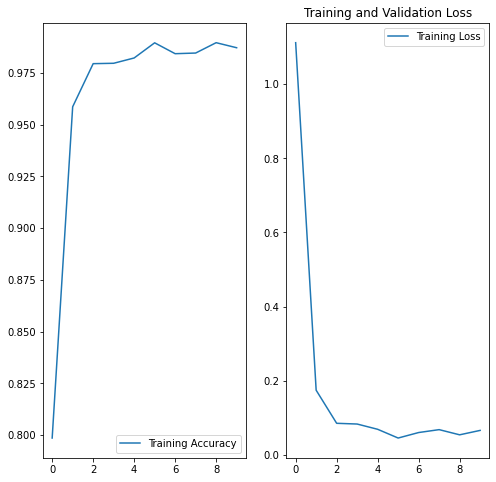

In [72]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']

loss=history.history['loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()